# Исследовательский анализ данных Яндекс Афиша и проверка гипотез

Автор: Дубина Екатерина  
Дата: 14.09.2025

### Содержимое проекта
1. Загрузка данных и знакомство с ними
2. Предобработка данных и подготовка их к исследованию:
    - проверка на пропуски
    - изучение значений ключевых столбцов
    - проверка на дубликаты
    - преобразование типов данных
    - создание новых столбцов (*revenue_rub, one_ticket_revenue_rub, month, season*)
3. Исследовательский анализ данных:
    - анализ распределения заказов по сегментам и их сезонные изменения (динамика по разрезам: *event_type_main, device_type_canonical, age_limit*)
    - анализ осенней активности пользователей (в разрезе дней и дней недели)
    - анализ распределения событий по регионам и партнерам
4. Статистический анализ данных:
   - проверка гипотезы о среднем количестве заказов
   - проверка гипотрезы о среднем времени между заказами
5. Общий вывод и рекомендации.

## 1. Загрузка данных и знакомство с ними

In [3]:
#вывод общей информации о датафрейме
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

In [4]:
#вывод рандомных строк датафрейма
orders_df.sample(5)

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
90111,2190980,414f252f45c7bac,2024-10-20,2024-10-20 20:06:54,553904,нет,16,rub,desktop,370.51,Облачко,2,4631.43,0.0
164672,2591412,85929277659c29f,2024-10-03,2024-10-03 21:31:24,566037,нет,16,rub,mobile,148.80,Облачко,1,1352.74,0.0
153703,414643,7eb4fc207ecc10f,2024-07-31,2024-07-31 11:53:50,553512,нет,6,rub,mobile,0.00,Билеты без проблем,3,0.00,0.0
132681,7915493,684e4c7a3ed0a1e,2024-08-23,2024-08-23 15:55:48,553537,нет,0,rub,mobile,46.23,Билеты в руки,2,1155.76,5.0
210856,8442481,b0076384887de2a,2024-09-13,2024-09-13 13:11:42,486728,нет,16,rub,mobile,20.02,Билеты в руки,1,667.37,0.0


In [5]:
#вывод общей информации о датафрейме
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


In [6]:
#вывод рандомных строк датафрейма
events_df.sample(5)

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
7764,445660,c306f733-4d8b-4b4c-80e6-8aaa09558f6d,событие,другое,№1702,Травиницкий округ,Сосновечин,64,1674,"Кабинет Искусств ""Огни"" Групп","наб. Горняцкая, д. 4/3 к. 1/4"
12982,534468,7999f4e4-1c3b-46e5-9d40-8ee596aee1a8,концерт,концерты,№4386,Каменевский регион,Глиногорск,213,1414,"Театр поэзии ""Симфония"" Инк","ш. Подгорное, д. 455"
15142,544196,a1cd4679-cce1-4b7c-bbde-0701ed80ce16,концерт,концерты,№4336,Широковская область,Ягодиновка,239,1383,"Площадка для танцев ""Смысл"" Групп","наб. Одесская, д. 5"
17663,557787,45c13513-b02c-400d-b353-ffbdc886b504,концерт,концерты,№3702,Широковская область,Ягодиновка,239,4225,"Кинокомпания ""Динамика"" Лтд","наб. Суворова, д. 8/5 стр. 8"
14892,543504,f2431061-12fd-432a-9c7a-c37ea18c70d6,событие,другое,№3087,Озернопольская область,Чистогорье,198,1918,"Команда поэтов ""Стиль"" Лимитед","бул. Запорожский, д. 142"


In [7]:
#вывод общей информации о датафрейме
tenge_curs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


In [8]:
#вывод рандомных строк датафрейма
tenge_curs_df.sample(5)

,data,nominal,curs,cdx
11,2024-01-21,100,19.6081,kzt
209,2024-08-06,100,17.8998,kzt
306,2024-11-11,100,19.8760,kzt
108,2024-04-27,100,20.7135,kzt
16,2024-01-26,100,19.9035,kzt


На основе имеющихся датасетов созданы три датафрейма: `orders_df, events_df, tenge_curs_df`.   
При знакомстве с данными:
- несоответствий между наименованием столбца и их содержимым не выявлено;
- индексы не именованы и представлены порядковыми номерами;
- названия столбцов отражены "змеиным" стилем;
- пропуски в одном столбце *days_since_prev* (их наличие объясняется содержанием: пустое значение= первому заказу пользователя в пределах анализируемого временного периода);
- столбцы с информацией о дате имеют тип данных *object* (далее необходимо преобразовать в *datetime* и изменить формат в столбце *created_dt_msk* (убрать время));
- числовые столбцы имеют максимальную разрядность (для оптимизиции далее можно преобразовать);
- в датафреймах есть общие столбцы (далее можно провести объедининие в единый датафрейм).

## 2. Предобработка данных и подготовка их к исследованию

In [9]:
#объединение датафремов
afisha_df= orders_df.merge(events_df, on='event_id')

### 2.1 Проверка на пропуски

In [10]:
#вывод информации о новом датафрейме
afisha_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290611 entries, 0 to 290610
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                290611 non-null  int64  
 1   user_id                 290611 non-null  object 
 2   created_dt_msk          290611 non-null  object 
 3   created_ts_msk          290611 non-null  object 
 4   event_id                290611 non-null  int64  
 5   cinema_circuit          290611 non-null  object 
 6   age_limit               290611 non-null  int64  
 7   currency_code           290611 non-null  object 
 8   device_type_canonical   290611 non-null  object 
 9   revenue                 290611 non-null  float64
 10  service_name            290611 non-null  object 
 11  tickets_count           290611 non-null  int64  
 12  total                   290611 non-null  float64
 13  days_since_prev         268698 non-null  float64
 14  event_name          

In [11]:
# проверка на пропуски 
afisha_df.isna().any()

order_id                  False
user_id                   False
created_dt_msk            False
created_ts_msk            False
event_id                  False
cinema_circuit            False
age_limit                 False
currency_code             False
device_type_canonical     False
revenue                   False
service_name              False
tickets_count             False
total                     False
days_since_prev            True
event_name                False
event_type_description    False
event_type_main           False
organizers                False
region_name               False
city_name                 False
city_id                   False
venue_id                  False
venue_name                False
venue_address             False
dtype: bool

In [12]:
# замена пропусков на ноль в столбце days_since_prev
afisha_df['days_since_prev']= afisha_df['days_since_prev'].fillna(0)

На первом этапе проведено объединение датафреймов *order_df* и *event_df* на основании данных из столбца *event_id*.   
В результате итоговый датафрейм представлен 290611 заказами.   
237 заказов не вошли, т.к. был выбран тип объединения *inner* (задачи исследования предполагают, в т.ч. анализ заказов в разрезе мероприятий, поэтому наличие заказов без информации о них может исказить результаты). 
Пропуски обнаружены в столбце (*days_since_prev*). Исходя их содеражние столбца, это записи с первым заказом пользователя в пределах анализируемого периода.
В рамках предобработки пропуски заменены на ноль. 

### 2.2 Изучение значений ключевых столбцов

In [13]:
#вывод уникальных категориальных значений столбцов
print(f"age_limit: {afisha_df['age_limit'].unique()}")
print(f"currency_code: {afisha_df['currency_code'].unique()}")
print(f"device_type_canonical: {afisha_df['device_type_canonical'].unique()}")
print(f"service_name: {afisha_df['service_name'].unique()}")
print(f"event_type_main: {afisha_df['event_type_main'].unique()}")

age_limit: [16  0 18 12  6]
currency_code: ['rub' 'kzt']
device_type_canonical: ['mobile' 'desktop']
service_name: ['Край билетов' 'Мой билет' 'За билетом!' 'Лови билет!'
 'Билеты без проблем' 'Билеты в руки' 'Облачко' 'Дом культуры'
 'Весь в билетах' 'Лучшие билеты' 'Прачечная' 'Выступления.ру' 'Мир касс'
 'Тебе билет!' 'Быстробилет' 'Яблоко' 'Show_ticket'
 'Городской дом культуры' 'Билет по телефону' 'Crazy ticket!' 'Росбилет'
 'Шоу начинается!' 'Цвет и билет' 'Быстрый кассир' 'Восьмёрка' 'Телебилет'
 'Реестр' 'КарандашРУ' 'Радио ticket' 'Дырокол' 'Вперёд!' 'Кино билет'
 'Зе Бест!' 'Тех билет' 'Лимоны' 'Билеты в интернете']
event_type_main: ['театр' 'выставки' 'другое' 'стендап' 'концерты' 'спорт' 'ёлки']


In [14]:
#вывод стат.характеристик для заказов в рублях
afisha_df[afisha_df['currency_code']=='rub'].describe().T.style.format('{:.2f}')

,count,mean,std,min,25%,50%,75%,max
order_id,285542.00,4327734.95,2499339.90,1.00,2160015.25,4331687.50,6492513.75,8653108.00
event_id,285542.00,436228.27,148029.69,4436.00,355361.00,494565.00,546167.00,592325.00
age_limit,285542.00,10.19,6.54,0.00,6.00,12.00,16.00,18.00
revenue,285542.00,548.01,871.75,-90.76,114.17,346.63,793.32,81174.54
tickets_count,285542.00,2.75,1.17,1.00,2.00,3.00,4.00,57.00
total,285542.00,6330.62,8619.33,-358.85,2120.07,4673.85,8783.22,811745.40
days_since_prev,285542.00,2.97,10.92,0.00,0.00,0.00,1.00,148.00
city_id,285542.00,906.74,3447.87,2.00,39.00,74.00,213.00,37172.00
venue_id,285542.00,2714.32,1089.21,894.00,1706.00,2795.00,3699.00,4677.00


In [15]:
#вывод стат.характеристик для заказов в тенге
afisha_df[afisha_df['currency_code']=='kzt'].describe().T.style.format('{:.2f}')

,count,mean,std,min,25%,50%,75%,max
order_id,5069.00,4241196.36,2393294.91,27580.00,2291262.00,4083752.00,6256664.00,8652702.00
event_id,5069.00,538940.39,35666.53,42299.00,533803.00,536826.00,559476.00,588573.00
age_limit,5069.00,11.46,4.82,0.00,6.00,12.00,16.00,18.00
revenue,5069.00,4995.21,4916.75,0.00,518.10,3698.83,7397.66,26425.86
tickets_count,5069.00,2.76,1.12,1.00,2.00,3.00,4.00,6.00
total,5069.00,75236.97,68039.22,0.00,9353.70,61647.16,114868.83,344606.50
days_since_prev,5069.00,3.38,12.54,0.00,0.00,0.00,1.00,147.00
city_id,5069.00,2642.92,8155.91,16.00,162.00,163.00,163.00,29463.00
venue_id,5069.00,2544.86,932.04,922.00,1533.00,2169.00,3407.00,4481.00


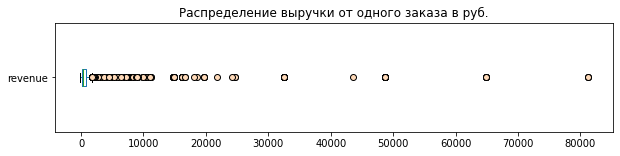

In [16]:
#построение диаграммы размаха (выручка от заказов в рублях)
afisha_df[afisha_df['currency_code']=='rub']['revenue'].plot(figsize=(10,2), 
                                                             kind='box', 
                                                             vert=False,
                                                             flierprops=dict(markerfacecolor='peachpuff'))
plt.title('Распределение выручки от одного заказа в руб.')
plt.show()

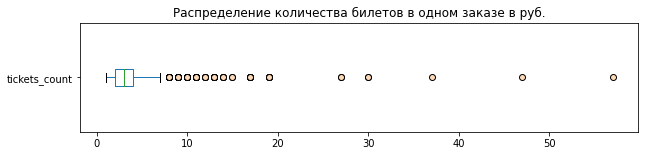

In [17]:
#построение диаграммы размаха (количество билетов в заказах в рублях)
afisha_df[afisha_df['currency_code']=='rub']['tickets_count'].plot(figsize=(10,2), 
                                                             kind='box', 
                                                             vert=False,
                                                             flierprops=dict(markerfacecolor='peachpuff'))
plt.title('Распределение количества билетов в одном заказе в руб.')
plt.show()

In [18]:
# заказы с нулевой или отрицательной выручкой
afisha_df[(afisha_df['currency_code']=='rub') & (afisha_df['revenue']<=0)]

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
1249,3253250,0018ecd8a38a51b,2024-07-25,2024-07-25 20:38:57,548041,нет,18,rub,mobile,0.00,...,102fa659-6ca3-4a78-a0a4-20a0339679b5,спорт,спорт,№4548,Медовская область,Радужсвет,47,3474,"Креативное пространство ""Вдох"" Лимитед","бул. Пригородный, д. 7/1"
1250,5731329,02ea4583333f064,2024-07-12,2024-07-12 12:19:09,548041,нет,18,rub,mobile,0.00,...,102fa659-6ca3-4a78-a0a4-20a0339679b5,спорт,спорт,№4548,Медовская область,Радужсвет,47,3474,"Креативное пространство ""Вдох"" Лимитед","бул. Пригородный, д. 7/1"
1251,3654813,0727e8d6b4f571e,2024-07-22,2024-07-22 22:09:38,548041,нет,18,rub,mobile,0.00,...,102fa659-6ca3-4a78-a0a4-20a0339679b5,спорт,спорт,№4548,Медовская область,Радужсвет,47,3474,"Креативное пространство ""Вдох"" Лимитед","бул. Пригородный, д. 7/1"
1252,3654784,0727e8d6b4f571e,2024-07-23,2024-07-23 14:35:09,548041,нет,18,rub,mobile,0.00,...,102fa659-6ca3-4a78-a0a4-20a0339679b5,спорт,спорт,№4548,Медовская область,Радужсвет,47,3474,"Креативное пространство ""Вдох"" Лимитед","бул. Пригородный, д. 7/1"
1253,5015638,1c2a2133e1df1b4,2024-07-29,2024-07-29 15:27:25,548041,нет,18,rub,desktop,0.00,...,102fa659-6ca3-4a78-a0a4-20a0339679b5,спорт,спорт,№4548,Медовская область,Радужсвет,47,3474,"Креативное пространство ""Вдох"" Лимитед","бул. Пригородный, д. 7/1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290173,8188818,f6af1139a64d911,2024-10-31,2024-10-31 14:03:41,563139,нет,0,rub,mobile,0.00,...,5dbb69f1-9204-4329-a277-4f59e5d401f0,событие,другое,№2490,Лесостепной край,Крутовинск,44,4481,"Школа сценического мастерства ""Вдох"" Лтд","пер. Полярный, д. 87"
290214,5933169,f7a0146fc193947,2024-09-29,2024-09-29 12:55:01,494847,нет,6,rub,mobile,0.00,...,c721d0b9-a09d-4af7-9019-830de1a912bf,концерт,концерты,№3877,Зеленоградский округ,Шаныртау,24,3277,"Спектакль ""Атмосфера"" Лтд","бул. Вавилова, д. 7 к. 2"
290544,1338032,fe237d2cfd6e503,2024-09-27,2024-09-27 19:36:11,501814,нет,18,rub,mobile,0.00,...,073b2720-2d1a-47bc-ad89-5ab99eaf8160,событие,другое,№3685,Медовская область,Радужсвет,47,4104,"Выставка ремесел ""Зеленый"" Инк","алл. Сурикова, д. 93 к. 3"
290556,3700575,fe237d2cfd6e503,2024-10-12,2024-10-12 08:11:33,247058,нет,12,rub,mobile,-5.70,...,a3214473-934e-44ad-a8da-82915f51583f,концерт,концерты,№1437,Речицкая область,Радужанов,11,2136,"Театр документального кино ""Дизайнер"" Лтд","бул. 50 лет Победы, д. 881"


In [19]:
# вывод заказов с количеством билетов больше 15
orders_df[(orders_df['currency_code']=='rub')&(orders_df['tickets_count']>15)]

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
39447,5338292,18e9aead0a393e7,2024-09-09,2024-09-09 10:03:45,561027,нет,12,rub,desktop,640.41,Билеты без проблем,47,32020.47,0.0
86350,5190682,3ee7dc2e115847f,2024-10-06,2024-10-06 13:08:42,575780,нет,0,rub,desktop,328.49,Лови билет!,27,10949.60,0.0
86353,5190653,3ee7dc2e115847f,2024-10-06,2024-10-06 13:06:40,575780,нет,0,rub,desktop,328.49,Лови билет!,27,10949.60,0.0
143041,1427845,76694a971889caa,2024-10-18,2024-10-18 09:59:15,542512,нет,0,rub,desktop,179.64,Билеты без проблем,17,2994.08,5.0
153441,806259,7eb4fc207ecc10f,2024-07-19,2024-07-19 17:06:30,516731,нет,16,rub,desktop,1926.71,Мой билет,19,38534.28,0.0
153443,806114,7eb4fc207ecc10f,2024-07-19,2024-07-19 16:51:50,516731,нет,16,rub,desktop,1723.90,Мой билет,17,34478.04,0.0
153444,806230,7eb4fc207ecc10f,2024-07-19,2024-07-19 17:21:09,516731,нет,16,rub,desktop,1723.90,Мой билет,17,34478.04,0.0
153448,806288,7eb4fc207ecc10f,2024-07-19,2024-07-19 16:34:49,516731,нет,16,rub,desktop,1723.90,Мой билет,17,34478.04,0.0
153451,806143,7eb4fc207ecc10f,2024-07-19,2024-07-19 17:13:59,516731,нет,16,rub,desktop,1926.71,Мой билет,19,38534.28,0.0
154138,3526517,7eb4fc207ecc10f,2024-08-22,2024-08-22 11:23:50,557574,нет,0,rub,desktop,0.00,Билеты без проблем,57,0.00,0.0


In [20]:
#создание переменной со значением 99 перцентиля по выручке
anomalies= afisha_df[afisha_df['currency_code']=='rub']['revenue'].quantile(0.99)

#создание датафрейма без рублевых заказов с отрицательной и нулевой стоимостью и аномальных значений по выручке
afisha_df_rub= afisha_df[(afisha_df['currency_code']=='rub')&(afisha_df['total']>0)&(afisha_df['revenue']>0)&(afisha_df['revenue']<=anomalies)]

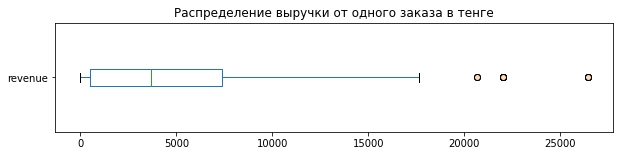

In [21]:
#построение диаграммы размаха (выручка от заказов в тенге)
afisha_df[afisha_df['currency_code']=='kzt']['revenue'].plot(figsize=(10,2), 
                                                             kind='box', 
                                                             vert=False,
                                                             flierprops=dict(markerfacecolor='peachpuff'))
plt.title('Распределение выручки от одного заказа в тенге')
plt.show()

In [22]:
# вывод заказов в тенге с аномальными значениями по выручке
orders_df[(orders_df['currency_code']=='kzt')&(orders_df['revenue']>15000)]

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
289,720419,00f4f5244501ce6,2024-06-11,2024-06-11 20:15:57,536826,нет,12,kzt,mobile,22021.55,Мой билет,5,275269.40,NaN
822,4451269,019fa401ddb00aa,2024-06-11,2024-06-11 12:33:38,536826,нет,12,kzt,mobile,22021.55,Мой билет,5,275269.40,2.0
3338,4794078,02ea4583333f064,2024-06-11,2024-06-11 13:53:10,536825,нет,12,kzt,mobile,17230.32,Мой билет,5,287172.10,0.0
3340,4794049,02ea4583333f064,2024-06-11,2024-06-11 13:55:54,536825,нет,12,kzt,mobile,20676.39,Мой билет,6,344606.50,0.0
3350,6041049,02ea4583333f064,2024-06-11,2024-06-11 12:04:36,536826,нет,12,kzt,mobile,17617.24,Мой билет,4,220215.55,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283338,5591201,fc950d43881de43,2024-06-11,2024-06-11 12:33:08,536826,нет,12,kzt,desktop,17617.24,Мой билет,4,220215.55,0.0
283339,5591375,fc950d43881de43,2024-06-11,2024-06-11 12:30:57,536826,нет,12,kzt,desktop,22021.55,Мой билет,5,275269.40,0.0
283340,5591346,fc950d43881de43,2024-06-11,2024-06-11 12:20:54,536826,нет,12,kzt,desktop,17617.24,Мой билет,4,220215.55,0.0
289886,2043341,fe936ae193261e0,2024-06-14,2024-06-14 16:13:04,536826,нет,12,kzt,mobile,17617.24,Мой билет,4,220215.55,2.0


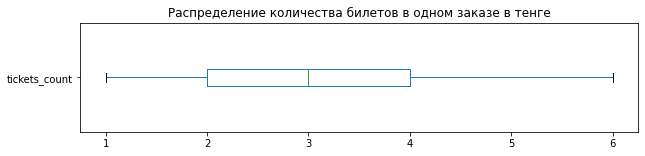

In [23]:
#построение диаграммы размаха (количество билетов в заказах в тенге)
afisha_df[afisha_df['currency_code']=='kzt']['tickets_count'].plot(figsize=(10,2), 
                                                             kind='box', 
                                                             vert=False,
                                                             flierprops=dict(markerfacecolor='peachpuff'))
plt.title('Распределение количества билетов в одном заказе в тенге')
plt.show()

In [24]:
#создание датафрейма без заказов в тенге с нулевой стоимостью или выручкой
afisha_df_kzt=afisha_df[(afisha_df['currency_code']=='kzt')&(afisha_df['total']>0)&(afisha_df['revenue']>0)]

In [25]:
# объединение в один датафрейм отфильтрованных заказов в рублях и тенге
afisha_df=pd.concat([afisha_df_rub, afisha_df_kzt])

In [26]:
# размер отфильтрованного датафрейма 
afisha_df.shape

(281904, 24)

При знакомстве с категориальными значениями в столбцах пропусков не выявлено.   

Ключевыми числовыми столбцами в рамках исследования является *revenue* и *tickets_count*. Детальный анализ их статистических характеристик, в т.ч. с построением диаграмм размаха, проводился в разрезе валют. По результатам выявлено:

 для `рублевых` заказов
 - ассиметричное распределение значений *revenue* (существенная разница между средним и медианным значением);
 - широкий разброс значений *revenue* (высокое стандартное отклонение и большой размах между минимальным и максимальным значением);
 - наличие выбросов в *revenue* и *tickets_count*;
 - наличие отрицательных значений в *revenue*  
 
 для заказов в `тенге`
 - ассиметричное распределение значений *revenue* (существенная разница между средним и медианным значением);
 - широкий разброс значений *revenue* (высокое стандартное отклонение и большой размах между минимальным и максимальным значением);
 - наличие нулевых значений в *revenue*;
 - наличие нескольких выбросов в *revenue*.

 С учетом этого проведена фильтрация датафрейма:
 - отобраны значения по 99-ому процентилю *revenue*;
 - исключены заказы с нулевой/отрицательной стоимостью и выручкой.  
 Наличие таких заказов в выборке может быть как ошибкой при логировании, так и быть связанным со спецификой бизнес модели: заказы с нулевой стоимость, например,- заказы, оформленные по акциям/промокодам, отрицательной- возврат билета и т.д. Так как ключевая бизнес метрика- выручка, то есть доход именно от продажи билета, принято решение исключить их из исследования.  
 
Выбросы в *tickets_count* оставлены. Они представлены в небольшом количестве и вывод информации по ним не позволил подтвердить ошибку в записях (стоимость в целом соразмерна с количеством билетов в заказе, остальные данные о заказе также не искажены).

Размер отфильтрованного датафрейма- 281 904 записи.

### 2.3 Проверка на дубликаты

In [27]:
#проверка на явные дубликаты
afisha_df[afisha_df.duplicated()]

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address


In [28]:
# проверка на неявные дубликаты
pd.set_option('display.max_columns', None)

afisha_df[afisha_df.duplicated(subset=['user_id', 'created_ts_msk', 'revenue', 'service_name', 'tickets_count', 'total', 'city_id'], keep=False)]

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
3838,7299649,a0384c26d91e09e,2024-08-24,2024-08-24 00:07:14,534657,нет,16,rub,mobile,679.21,Быстробилет,2,5224.70,0.0,dff567b7-11a5-4c4c-b223-70c8ab7efd15,концерт,концерты,№1134,Ветренский регион,Кокжар,20,2866,"Школа фотографии ""Золотое"" Инк","ш. Микрорайон, д. 79 стр. 50"
3839,7299678,a0384c26d91e09e,2024-08-24,2024-08-24 00:07:14,534657,нет,16,rub,mobile,679.21,Быстробилет,2,5224.70,0.0,dff567b7-11a5-4c4c-b223-70c8ab7efd15,концерт,концерты,№1134,Ветренский регион,Кокжар,20,2866,"Школа фотографии ""Золотое"" Инк","ш. Микрорайон, д. 79 стр. 50"
43477,1935113,206ea45ec11d478,2024-10-29,2024-10-29 16:46:54,442183,нет,16,rub,mobile,601.69,Билеты в руки,2,6016.94,32.0,dcf6f06f-8499-41d7-8bc2-a0e3d7afe313,концерт,концерты,№894,Каменевский регион,Глиногорск,213,4363,"Студия дизайна ""Лестница"" Лимитед","наб. Школьная, д. 9/8 стр. 7/5"
43479,1935171,206ea45ec11d478,2024-10-29,2024-10-29 16:46:54,442183,нет,16,rub,mobile,601.69,Билеты в руки,2,6016.94,0.0,dcf6f06f-8499-41d7-8bc2-a0e3d7afe313,концерт,концерты,№894,Каменевский регион,Глиногорск,213,4363,"Студия дизайна ""Лестница"" Лимитед","наб. Школьная, д. 9/8 стр. 7/5"
48970,5372628,7eb4fc207ecc10f,2024-08-23,2024-08-23 14:08:19,298035,нет,6,rub,mobile,126.84,Билеты без проблем,1,3170.95,0.0,09164a56-0fb3-43c7-91d3-8ed22bb3d8ef,событие,другое,№4403,Североярская область,Озёрск,2,2795,"Клуб исторических реконструкций ""Логос"" и парт...","пр. Пушкина, д. 8/6 к. 482"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262667,3463819,7eb4fc207ecc10f,2024-09-21,2024-09-21 11:43:58,448579,нет,0,rub,mobile,2.54,Лови билет!,1,84.82,0.0,a751c430-d352-44d7-99a0-29e97193eba5,спорт,спорт,№1622,Североярская область,Озёрск,2,4607,"Команда артистов ""Светлячок"" Лимитед","пер. Невского, д. 72"
269548,1799219,9402cc20d69d44f,2024-09-30,2024-09-30 21:35:37,540784,нет,6,rub,desktop,177.04,За билетом!,2,2529.11,0.0,f0a4bbbc-c5bb-4648-884f-87c539056f5f,концерт,концерты,№1874,Каменевский регион,Глиногорск,213,2304,"Творческое объединение ""Гармония"" Инк","наб. Партизанская, д. 47"
269549,1799248,9402cc20d69d44f,2024-09-30,2024-09-30 21:35:37,540784,нет,6,rub,desktop,177.04,За билетом!,2,2529.11,0.0,f0a4bbbc-c5bb-4648-884f-87c539056f5f,концерт,концерты,№1874,Каменевский регион,Глиногорск,213,2304,"Творческое объединение ""Гармония"" Инк","наб. Партизанская, д. 47"
42679,3320153,ae8e3d5af3036a6,2024-07-30,2024-07-30 11:20:46,533803,нет,16,kzt,mobile,1849.41,Мой билет,1,30823.58,13.0,0686ac7b-6f3e-4177-bb73-16b54acd1223,фестиваль,концерты,№4950,Шанырский регион,Широковка,162,3407,"Арт-кафе ""Речка"" Лимитед","алл. Путейская, д. 548 стр. 7"


In [29]:
# удаление неявных дубликатов
afisha_df.drop_duplicates(subset=['user_id', 'created_ts_msk', 'revenue', 'service_name', 'tickets_count', 'total', 'city_id'], inplace=True)

In [30]:
afisha_df.shape

(281863, 24)

Явных дубликатов не выявлено, но найдены записи с дубликатами по нескольким столбцам (user_id, created_ts_msk, revenue, service_name, tickets_count, total, city_id).   
Их появление может быть связано с тех.ошибками, когда одному заказу присвоено несколько номеров или один заказ оказывается оформленным с двух устройств (вряд ли пользователь в одну секунду сделает два одинаковых заказа с мобильной и десктопной версии).   
Данные записи были удалены. В результате размер выборки сократился до 281 863 заказов.

### 2.4 Преобразование типов данных

In [31]:
# вывод информации по типам данных
pd.set_option('display.max_rows', None) 
afisha_df.dtypes

order_id                    int64
user_id                    object
created_dt_msk             object
created_ts_msk             object
event_id                    int64
cinema_circuit             object
age_limit                   int64
currency_code              object
device_type_canonical      object
revenue                   float64
service_name               object
tickets_count               int64
total                     float64
days_since_prev           float64
event_name                 object
event_type_description     object
event_type_main            object
organizers                 object
region_name                object
city_name                  object
city_id                     int64
venue_id                    int64
venue_name                 object
venue_address              object
dtype: object

In [32]:
# изменение типов данных
afisha_df['created_dt_msk']=pd.to_datetime(afisha_df['created_dt_msk'])
afisha_df['created_ts_msk']=pd.to_datetime(afisha_df['created_ts_msk'])
afisha_df['days_since_prev']=afisha_df['days_since_prev'].astype('int')

In [33]:
# оптимизация разрядности числовых столбцов
for i in afisha_df.dtypes.index:
    if afisha_df[i].dtype== 'int64':
        afisha_df[i]= pd.to_numeric(afisha_df[i], downcast='integer')
    elif afisha_df[i].dtype=='float64':
        afisha_df[i]= pd.to_numeric(afisha_df[i], downcast='float')

Столбцы с датой (*created_dt_msk, created_ts_msk*) приведены к типу datetime. Дополнительно изменен тип данных столбца *days_since_prev* (с float на integer, так как содержит только целочисленные значения). Дополнительно с целью оптимизации снижена размерность столбцов с количественными данными.

### 2.5 Создание новых столбцов

In [34]:
# предобработка датафрейма с курсом тенге
tenge_curs_df['data']=pd.to_datetime(tenge_curs_df['data'])
tenge_curs_df= tenge_curs_df[(tenge_curs_df['data']>'2024-05-31')&(tenge_curs_df['data']<'2024-11-01')]

In [35]:
# присоединение информации по курсу тенге к основному датафрейму
afisha_df=afisha_df.merge(tenge_curs_df, left_on='created_dt_msk', right_on='data')

In [36]:
# создание столбца со значением выручки в рублях (для всех заказов)
afisha_df['revenue_rub']=np.where(afisha_df['currency_code']=='kzt', afisha_df['revenue']*afisha_df['curs']/100, afisha_df['revenue'])

In [37]:
# создание столбца со значением выручки от продажи одного билета
afisha_df['one_ticket_revenue_rub']=afisha_df['revenue_rub']/afisha_df['tickets_count']

In [38]:
# создание столбца с номером месяца
afisha_df['month']=afisha_df['created_dt_msk'].dt.month

In [39]:
# создание столбца с информацией о сезоне
afisha_df['season']=pd.cut(afisha_df['month'], bins=[5,8,10], labels=['Лето','Осень'])

На данном этапе созданы четыре дополнительных столбцов:
- *revenue_rub* выручка в рублях (пересчет выручки от заказов в тенге проведен по курсу на дату заказа);
- *one_ticket_revenue_rub* выручка с продажи одного билета на мероприятие;
- *month* месяц оформления заказа;
- *season* информация о сезоне (лето/осень).

In [40]:
afisha_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281863 entries, 0 to 281862
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                281863 non-null  int32         
 1   user_id                 281863 non-null  object        
 2   created_dt_msk          281863 non-null  datetime64[ns]
 3   created_ts_msk          281863 non-null  datetime64[ns]
 4   event_id                281863 non-null  int32         
 5   cinema_circuit          281863 non-null  object        
 6   age_limit               281863 non-null  int8          
 7   currency_code           281863 non-null  object        
 8   device_type_canonical   281863 non-null  object        
 9   revenue                 281863 non-null  float32       
 10  service_name            281863 non-null  object        
 11  tickets_count           281863 non-null  int8          
 12  total                   281863

Таким образом, для исследовательского анализа данных и проверки статистических гипотез подготовлен датафрейм `afisha_df`, включающий 281 863 заказа.

## 3. Исследовательский анализ данных

### 3.1. Анализ распределения заказов по сегментам и их сезонные изменения

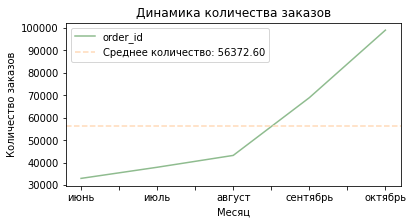

In [41]:
# группировка по месяцу заказу и агрегацией по количеству
afisha_df_months=afisha_df.groupby('month')['order_id'].count().reset_index()

# замена формата месяца
afisha_df_months=afisha_df_months.replace({'month':{6: 'июнь', 7: 'июль', 8: 'август', 9: 'сентябрь', 10: 'октябрь'}})

# построение линейного графика
afisha_df_months.plot(kind='line',
                      x='month',
                      color='darkseagreen',
                      figsize=(6,3)
                      )

plt.axhline(afisha_df_months['order_id'].mean(), 
            linestyle='--', 
            color='peachpuff', 
            label=f"Среднее количество: {afisha_df_months['order_id'].mean():.2f}"
            )

plt.title('Динамика количества заказов')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.legend()

plt.show()


In [42]:
#  создание датафрейма с группировкой по сезонам и подсчетом доли заказов по каждому типу мероприятия
afisha_df_season_eventtype= afisha_df.groupby('season')['event_type_main'].value_counts(normalize=True).unstack()
afisha_df_season_eventtype= afisha_df_season_eventtype.T.sort_values(by='Лето', ascending=False)

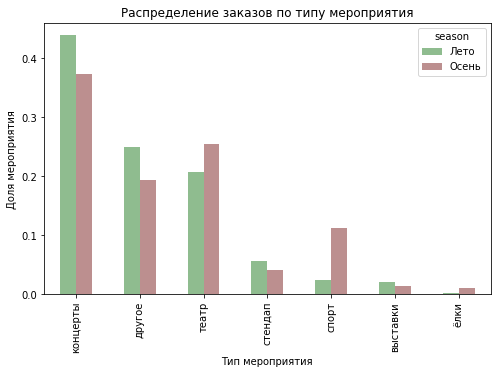

In [43]:
# построение столбчатой диаграммы
afisha_df_season_eventtype.plot(kind='bar', color=['darkseagreen', 'rosybrown'], figsize=(8,5))

plt.title('Распределение заказов по типу мероприятия')
plt.xlabel('Тип мероприятия')
plt.ylabel('Доля мероприятия')

plt.show()

In [44]:
#  создание датафрейма с группировкой по сезонам и подсчетом доли заказов по каждому типу устройства
afisha_df_season_devicetype=afisha_df.groupby('season')['device_type_canonical'].value_counts(normalize=True).unstack()
afisha_df_season_devicetype=afisha_df_season_devicetype.T.sort_values(by='Лето', ascending=False)

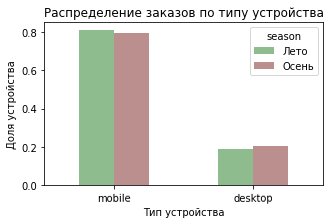

In [45]:
# построение столбчатой диаграммы
afisha_df_season_devicetype.plot(kind='bar',color= ['darkseagreen', 'rosybrown'], figsize=(5,3), rot=0.5)
                                 
plt.title('Распределение заказов по типу устройства')
plt.xlabel('Тип устройства')
plt.ylabel('Доля устройства')

plt.show()                                

In [46]:
#  создание датафрейма с группировкой по сезонам и подсчетом доли заказов по каждой возрастной категории
afisha_df_season_age= afisha_df.groupby('season')['age_limit'].value_counts(normalize=True).unstack()
afisha_df_season_age= afisha_df_season_age.T.sort_values(by='Лето', ascending=False)

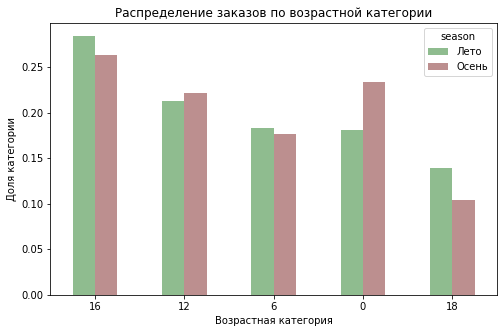

In [47]:
# построение столбчатой диаграммы
afisha_df_season_age.plot(kind='bar', color=['darkseagreen', 'rosybrown'], figsize=(8,5), rot=0.5)

plt.title('Распределение заказов по возрастной категории')
plt.xlabel('Возрастная категория')
plt.ylabel('Доля категории')

plt.show()

In [48]:
#  создание датафрейма с группировкой по сезонам и типам мероприятия и подсчетом средней выручки от проадиж одного билета
afisha_df_season_revenue= afisha_df.groupby(['season', 'event_type_main'])['one_ticket_revenue_rub'].mean().unstack().T
afisha_df_season_revenue.columns=['Лето', 'Осень']

In [49]:
# создание столбца с относительным изменение выручки от продажи одного билета между сезонами
afisha_df_season_revenue['change_pct']= round((afisha_df_season_revenue['Осень']/afisha_df_season_revenue['Лето']-1)*100, 2)
afisha_df_season_revenue= afisha_df_season_revenue.sort_values(by='change_pct', ascending=False)

In [50]:
# визуализация изменения выручки 
afisha_df_season_revenue.style.background_gradient(cmap='YlOrRd', subset=['change_pct'])

,Лето,Осень,change_pct
event_type_main,,,
выставки,86.744476,91.905092,5.950000
стендап,218.518108,231.124973,5.770000
спорт,55.247119,50.246679,-9.050000
другое,88.021277,77.421380,-12.040000
концерты,309.868959,268.424929,-13.370000
ёлки,271.436177,229.585590,-15.420000
театр,216.352713,176.084223,-18.610000


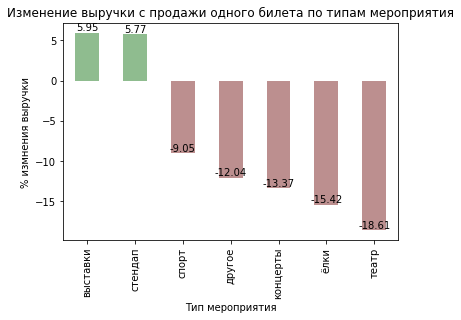

In [51]:
# построение столбчатой диаграммы
afisha_df_season_revenue['change_pct'].plot(kind='bar', 
                                                 color=afisha_df_season_revenue['change_pct'].apply(lambda x: 'darkseagreen' if x>0 else 'rosybrown'), 
                                                 figsize=(6,4)
)                   

for i, v in enumerate(afisha_df_season_revenue['change_pct']):
    plt.text(i, v, str(v), ha='center', va='bottom') 

plt.title('Изменение выручки с продажи одного билета по типам мероприятия')
plt.xlabel('Тип мероприятия')
plt.ylabel('% измнения выручки')

plt.show()   

На основе полученных данных можно говорить о росте количества заказов в осенние месяцы. Если в летние месяцы в 24г. их численность составляла менее 50тыс., то в осенние был тренд на увеличение, в результате в октябре значение достигло почти 100тыс.

В разрезе типов мероприятий лидер в оба сезона- *Концерты* (удельный вес выше 30%). На второй и третьей позициях- *Театр и Другое*. При этом если в летние месяцы зрители чаще отдавали предпочение Другое, то осенью больший спрос у Театров. Данное изменение можно аргументировать как погодными условиями (если в Другое, в том числе включены мероприятия на открытом воздухе, то осенняя погода может быть стоп-фактором), так и отпуском Театров в летние месяцы (как правило, июль-август).
Также стоит отметить, существенный прирост *Спорта* осенью (около 10%). 

По типам устройств (вне зависимости от сезона) большая часть заказов оформляется через *мобильные устройства* (80%).   

В разрезе возрастных категорий наибольшим спросом в оба сезона пользуются мероприятия для зрителей *старше 16* (свыше 25%). Относительно второй позиции: если летом это категория *от 12*, то осенью наблюдается существенный прирост заказов в категории от *0* (увеличение доли почти до 25%).   

Анализ средней стоимости одного билета в разрезе мероприятия показал прирост стоимости для категорий *Выставки, Стендап* (5.95 и 5.77% соответственно) и снижение для всех остальных категорий (максимальное у *Театров*- 18.61%). 

### 3.2. Осенняя активность пользователей

In [52]:
# создание таблицы с группировкой по дате (осень) и подсчетом числа заказов, количества активных пользователей, средней стоимости билета
afisha_df_autumn_days= afisha_df[afisha_df['season']=='Осень'].groupby('created_dt_msk').agg({'order_id':'count', 'user_id':'nunique', 'one_ticket_revenue_rub':'mean'}).reset_index()

# создние столбца со среднем числом заказов на одного пользователя
afisha_df_autumn_days['orders_per_user']=round(afisha_df_autumn_days['order_id']/afisha_df_autumn_days['user_id'],0)

afisha_df_autumn_days

,created_dt_msk,order_id,user_id,one_ticket_revenue_rub,orders_per_user
0,2024-09-01,1314,555,202.149068,2.0
1,2024-09-02,1370,571,190.847823,2.0
2,2024-09-03,5090,776,80.713513,7.0
3,2024-09-04,1758,684,179.567815,3.0
4,2024-09-05,1940,738,189.902317,3.0
5,2024-09-06,2065,835,180.488333,2.0
6,2024-09-07,1856,734,200.696369,3.0
7,2024-09-08,1598,656,195.071877,2.0
8,2024-09-09,2085,776,160.339481,3.0
9,2024-09-10,2009,762,185.433474,3.0


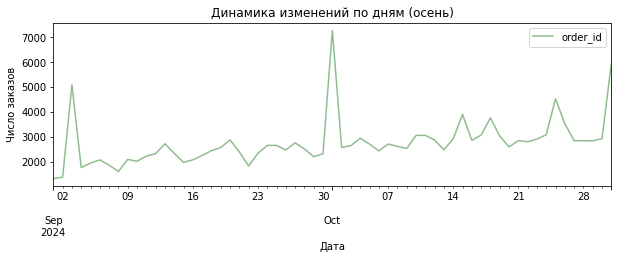

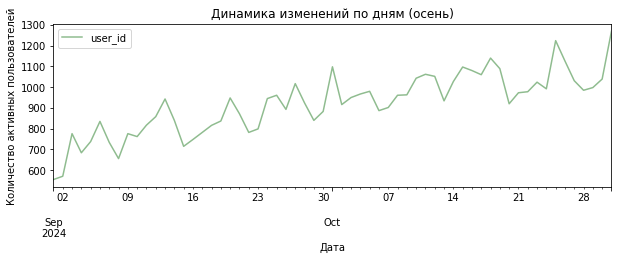

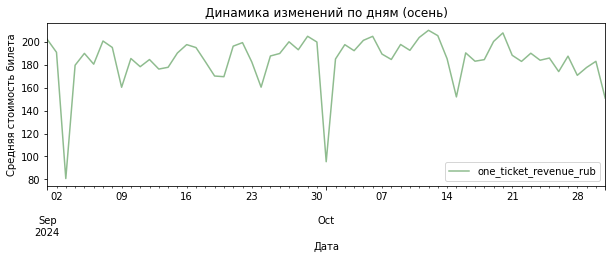

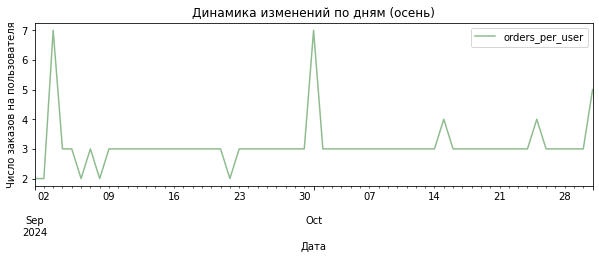

In [53]:
# создание словаря (ключ-метрика, значение- подпись для оси Y)
labels = {'order_id': 'Число заказов',
          'user_id': 'Количество активных пользователей',
          'orders_per_user': 'Число заказов на пользователя',
          'one_ticket_revenue_rub': 'Средняя стоимость билета'
         }

# создание линейного графика для каждой метрики
for column in afisha_df_autumn_days.columns:
    try:  #добавлено, чтобы цикл не уходил в ошибку на столбце created_dt_msk
        afisha_df_autumn_days.plot(kind='line',
                               x='created_dt_msk',
                               y=column,
                               color='darkseagreen',
                               figsize=(10, 3))
        plt.title('Динамика изменений по дням (осень)')
        plt.xlabel('Дата')
        plt.ylabel(labels.get(column))
        plt.show()
    except: 
        pass

In [54]:
# создание столбца с днем недели
afisha_df_autumn_days['day_of_week']=afisha_df_autumn_days['created_dt_msk'].dt.strftime('%a')

# группировка по дню недели и подсчет суммарного количества заказов
day_of_week= afisha_df_autumn_days.groupby('day_of_week')['order_id'].sum().reset_index()



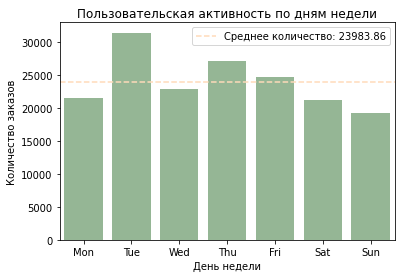

In [55]:
# построение столбчатой диаграммы
sns.barplot(data=day_of_week,
            x='day_of_week',
            y='order_id',
            order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
            color='darkseagreen',
            )
# линия со средним значением
plt.axhline(day_of_week['order_id'].mean(), 
            linestyle='--', 
            color='peachpuff', 
            label=f"Среднее количество: {day_of_week['order_id'].mean():.2f}"
            )


plt.title('Пользовательская активность по дням недели')
plt.legend()
plt.xlabel('День недели')
plt.ylabel('Количество заказов')
plt.show()

Детальный анализ осенней активности пользователей показал, что пиковое значение в количестве оформленных заказов пришлось на `01.10.24г`. (*свыше 7000*). Это существенно выше, чем в другие дни.   
В эту же дату наблюдается максимум по количеству билетов в заказе (*7*) и одно из минимальных значений в средней выручке с билета (*ниже 100руб.*).  
Похожий тренд есть в `03.09.24г`. (число оформленных заказов выше среднего, количество билетов в заказе максимальное, средняя стоимость билета минимальная).  
Можно предположить, что в начале двух месяцев Яндекс Афиша и ее партнеры проводили промоакции, которые увеличивали спрос пользователей за счет снижения цены на билеты.  
В части количества активных пользователей: метрика не статична на протяжении всего периода, но в целом есть тренд на увеличение. 

Анализ количества оформленных заказов в разрезе дней недели показал большую активность пользователей в будни (максимум приходится на *вторник- свыше 30000*), минимальные значения характерны для выходных (*суббота- около 20000, воскресенье- менее 20000*). Это можно объяснить тем, что пользователи, как правило, стараются посещать мероприятия в выходные, а как раз в будни занимают выбором и покупкой билетов на них.

###  3.3. Популярные события и партнёры

In [56]:
# создание таблицы с группировкой по регионам и подсчетом уникальных мероприятий и количества заказов
afisha_df_autumn_region= afisha_df[afisha_df['season']=='Осень'].groupby('region_name').agg({'event_id':'nunique', 'order_id':'count'}).reset_index()

# создание столбцов для расчета доли (в процентах) каждого региона
afisha_df_autumn_region['event_share_of_region']=round(afisha_df_autumn_region['event_id']/afisha_df_autumn_region['event_id'].sum()*100, 2)
afisha_df_autumn_region['order_share_of_region']=round(afisha_df_autumn_region['order_id']/afisha_df_autumn_region['order_id'].sum()*100, 2)

# создание таблицы с топ-10 по числу мероприятий
afisha_df_autumn_region_top10event= afisha_df_autumn_region.sort_values(by='event_id', ascending=False).head(10)

# создание таблицы с топ-10 по количества заказов
afisha_df_autumn_region_top10order= afisha_df_autumn_region.sort_values(by='order_id', ascending=False).head(10)

In [57]:
afisha_df_autumn_region.sort_values(by='order_id', ascending=False)

,region_name,event_id,order_id,event_share_of_region,order_share_of_region
23,Каменевский регион,3893,46573,24.68,27.74
59,Североярская область,2597,20626,16.46,12.29
41,Медовская область,361,12033,2.29,7.17
75,Широковская область,794,8645,5.03,5.15
44,Озернинский край,296,7526,1.88,4.48
56,Светополянский округ,755,4751,4.79,2.83
60,Серебринская область,456,4467,2.89,2.66
40,Малиновоярский округ,137,4412,0.87,2.63
76,Яблоневская область,431,4196,2.73,2.50
63,Солнечноземская область,401,4193,2.54,2.50


In [58]:
# вывод стат.характеристик
afisha_df_autumn_region.describe().T

,count,mean,std,min,25%,50%,75%,max
event_id,79.0,199.670886,531.094509,1.00,14.00,59.00,141.500,3893.00
order_id,79.0,2125.151899,5880.571349,9.00,180.00,561.00,1444.000,46573.00
event_share_of_region,79.0,1.265823,3.366640,0.01,0.09,0.37,0.895,24.68
order_share_of_region,79.0,1.266456,3.502743,0.01,0.11,0.33,0.860,27.74


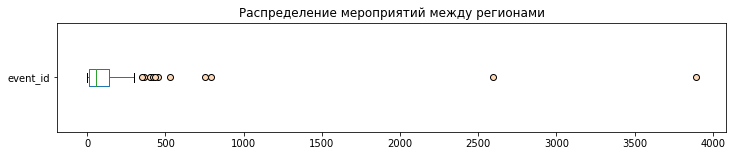

In [59]:
# построение диаграммы размаха для оценки распределения мероприятий между регионами
afisha_df_autumn_region.plot(kind='box', 
                             y='event_id', 
                             vert=False, 
                             figsize=(12, 2), 
                             flierprops=dict(markerfacecolor='peachpuff'))

plt.title('Распределение мероприятий между регионами')
plt.show()

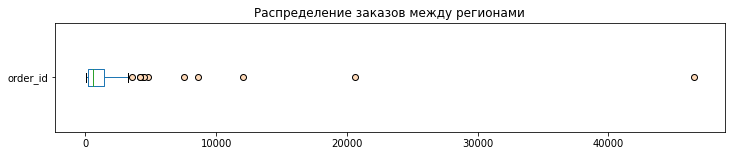

In [60]:
# построение диаграммы размаха для оценки распределения заказов между регионами
afisha_df_autumn_region.plot(kind='box', 
                             y='order_id', 
                             vert=False, 
                             figsize=(12, 2), 
                             flierprops=dict(markerfacecolor='peachpuff'))

plt.title('Распределение заказов между регионами')
plt.show()

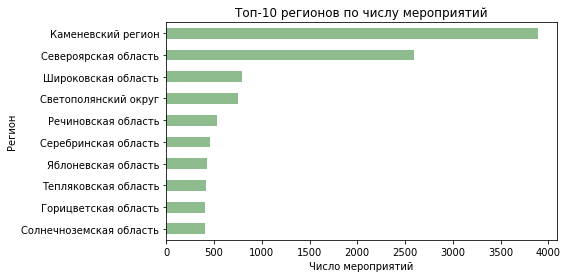

In [61]:
# изменение порядка сортировки, чтобы на графике отражалось от большего к меньшему
afisha_df_autumn_region_top10event=afisha_df_autumn_region_top10event.sort_values(by='event_id', ascending=True)

# построение графика
afisha_df_autumn_region_top10event.plot(kind='barh',
                                 x='region_name',
                                 y='event_id',
                                 color='darkseagreen',
                                 legend=False,
                                 figsize=(7, 4))

plt.title('Топ-10 регионов по числу мероприятий')
plt.xlabel('Число мероприятий')
plt.ylabel('Регион')
plt.show()

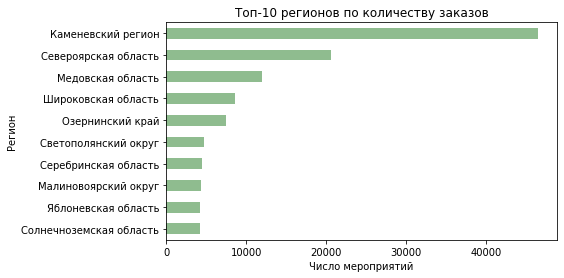

In [62]:
# изменение порядка сортировки, чтобы на графике отражалось от большего к меньшему
afisha_df_autumn_region_top10order=afisha_df_autumn_region_top10order.sort_values(by='order_id', ascending=True)

# построение графика
afisha_df_autumn_region_top10order.plot(kind='barh',
                                 x='region_name',
                                 y='order_id',
                                 color='darkseagreen',
                                 legend=False,
                                 figsize=(7, 4))

plt.title('Топ-10 регионов по количеству заказов')
plt.xlabel('Число мероприятий')
plt.ylabel('Регион')
plt.show()

In [63]:
# создание таблицы с группировкой по партнерам и подсчетом уникальных мероприятий, количества заказов, суммарной выручки
afisha_df_autumn_service= afisha_df[afisha_df['season']=='Осень'].groupby('service_name').agg({'event_id':'nunique', 'order_id':'count','revenue_rub':'sum'}).reset_index()

# создание столбцов для расчета доли (в процентах) каждого партнера
afisha_df_autumn_service['event_share_of_region']=round(afisha_df_autumn_service['event_id']/afisha_df_autumn_service['event_id'].sum()*100, 2)
afisha_df_autumn_service['order_share_of_region']=round(afisha_df_autumn_service['order_id']/afisha_df_autumn_service['order_id'].sum()*100, 2)
afisha_df_autumn_service['revenue_share_of_region']=round(afisha_df_autumn_service['revenue_rub']/afisha_df_autumn_service['revenue_rub'].sum()*100, 2)

# создание таблицы с топ-10 по числу мероприятий
afisha_df_autumn_service_top10event= afisha_df_autumn_service.sort_values(by='event_id', ascending=False).head(10)

# создание таблицы с топ-10 по количества заказов
afisha_df_autumn_service_top10order= afisha_df_autumn_service.sort_values(by='order_id', ascending=False).head(10)

# создание таблицы с топ-10 по выручке
afisha_df_autumn_service_top10revenue= afisha_df_autumn_service.sort_values(by='revenue_rub', ascending=False).head(10)

In [64]:
afisha_df_autumn_service.sort_values(by='event_id', ascending=False).round(2)

,service_name,event_id,order_id,revenue_rub,event_share_of_region,order_share_of_region,revenue_share_of_region
21,Лови билет!,3584,25709,10381964.59,20.84,15.31,12.68
3,Билеты без проблем,2821,32027,12172602.97,16.40,19.08,14.86
5,Билеты в руки,2445,25534,7612964.66,14.22,15.21,9.30
25,Облачко,1409,15478,10611051.68,8.19,9.22,12.96
22,Лучшие билеты,1377,12349,1676033.68,8.01,7.36,2.05
24,Мой билет,1005,19415,10850550.70,5.84,11.56,13.25
30,Тебе билет!,858,3759,2166184.84,4.99,2.24,2.65
26,Прачечная,728,5798,2548310.46,4.23,3.45,3.11
8,Весь в билетах,599,9415,9350393.96,3.48,5.61,11.42
34,Яблоко,537,3473,2763332.31,3.12,2.07,3.37


In [65]:
# вывод стат.характеристик
afisha_df_autumn_service.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
event_id,35.0,491.31,865.36,1.00,8.50,131.00,568.00,3584.00
order_id,35.0,4796.77,8531.11,1.00,56.00,917.00,3616.00,32027.00
revenue_rub,35.0,2339664.82,3754192.73,30.01,26840.04,606630.13,2357247.65,12172602.97
event_share_of_region,35.0,2.86,5.03,0.01,0.05,0.76,3.30,20.84
order_share_of_region,35.0,2.86,5.08,0.00,0.04,0.55,2.16,19.08
revenue_share_of_region,35.0,2.86,4.58,0.00,0.04,0.74,2.88,14.86


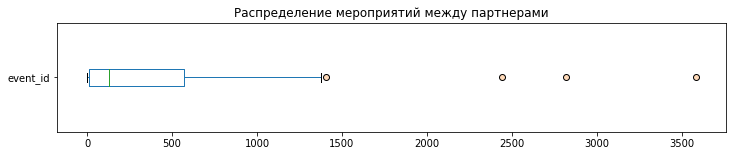

In [66]:
# построение диаграммы размаха для оценки распределения мероприятий между партнерами
afisha_df_autumn_service.plot(kind='box',
                              y='event_id',
                              vert=False, 
                              figsize=(12, 2), 
                              flierprops=dict(markerfacecolor='peachpuff'))

plt.title('Распределение мероприятий между партнерами')
plt.show()

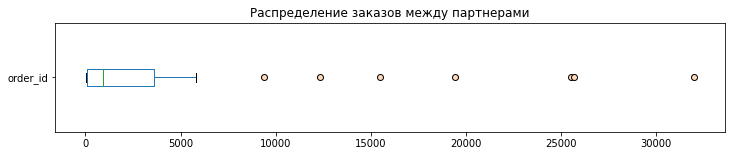

In [67]:
# построение диаграммы размаха для оценки распределения заказов между партнерами
afisha_df_autumn_service.plot(kind='box',
                              y='order_id',
                              vert=False, 
                              figsize=(12, 2), 
                              flierprops=dict(markerfacecolor='peachpuff'))

plt.title('Распределение заказов между партнерами')
plt.show()

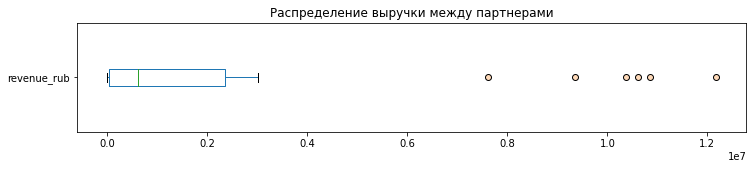

In [68]:
# построение диаграммы размаха для оценки распределения выручки между партнерами
afisha_df_autumn_service.plot(kind='box',
                              y='revenue_rub',
                              vert=False, 
                              figsize=(12, 2), 
                              flierprops=dict(markerfacecolor='peachpuff'))

plt.title('Распределение выручки между партнерами')
plt.show()

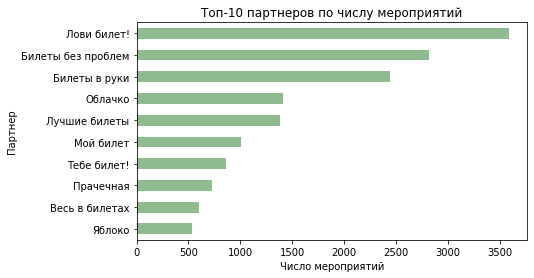

In [69]:
# изменение порядка сортировки, чтобы на графике отражалось от большего к меньшему
afisha_df_autumn_service_top10event=afisha_df_autumn_service_top10event.sort_values(by='event_id', ascending=True)

# построение графика
afisha_df_autumn_service_top10event.plot(kind='barh',
                                         x='service_name',
                                         y='event_id',
                                         color='darkseagreen',
                                         legend=False,
                                         figsize=(7, 4))

plt.title('Топ-10 партнеров по числу мероприятий')
plt.xlabel('Число мероприятий')
plt.ylabel('Партнер')
plt.show()

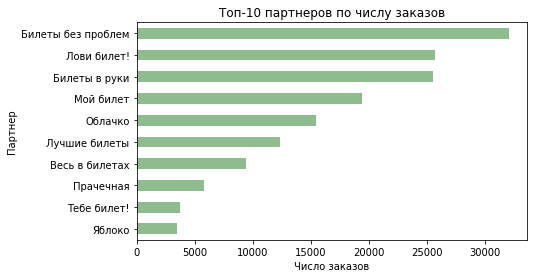

In [70]:
# изменение порядка сортировки, чтобы на графике отражалось от большего к меньшему
afisha_df_autumn_service_top10event=afisha_df_autumn_service_top10event.sort_values(by='order_id', ascending=True)

# построение графика
afisha_df_autumn_service_top10event.plot(kind='barh',
                                         x='service_name',
                                         y='order_id',
                                         color='darkseagreen',
                                         legend=False,
                                         figsize=(7, 4))

plt.title('Топ-10 партнеров по числу заказов')
plt.xlabel('Число заказов')
plt.ylabel('Партнер')
plt.show()

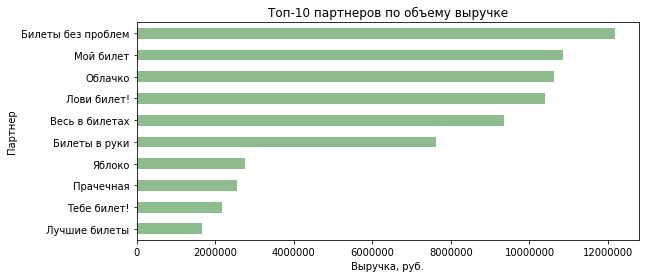

In [71]:
# изменение порядка сортировки, чтобы на графике отражалось от большего к меньшему
afisha_df_autumn_service_top10event=afisha_df_autumn_service_top10event.sort_values(by='revenue_rub', ascending=True)

# построение графика
afisha_df_autumn_service_top10event.plot(kind='barh',
                                         x='service_name',
                                         y='revenue_rub',
                                         color='darkseagreen',
                                         legend=False,
                                         figsize=(9, 4))

plt.title('Топ-10 партнеров по объему выручке')
plt.xlabel('Выручка, руб.')
plt.ylabel('Партнер')
plt.ticklabel_format(axis='x', style='plain')
plt.show()

Среди регионов есть явные лидеры *Каменевский регион и Североярская область*. На их долю приходится больше 15% как от общего числа, проводимых мероприятий, так и от общего числа заказов (46573 и 3893 в абсолютном значении).  
При этом распределение (по обеим метрикам) между регионами неравномерное (выбросы, большое значение стандартного отклонения). Большая часть регионов имеет значение в пределах 59 по числу мероприятий и 561 по количеству заказов.   

В разрезе партнеров лидер не статичен и меняется в зависимости от метрики.   
Так, по числу мероприятий наибольшее разнообразие предлагает *Лови билет!* (свыше 3500), далее следует *Билеты без проблем и Билеты в руки* (от 2500 до 3000).   
По числу заказов топ-3 тот же, но на первой позиции *Билеты без проблем* (свыше 30000). На второй и третьей позиция значение существенно ниже (26000).  
По выручке: максимальный объем генерится за счет продаж билетов оператора- *Билеты без проблем* (около 12 млн.руб.), а вот два других лидера по объему продаж занимают 4 и 6 позицию. Вверх выходят *Мой билет и Облачко*. На основе этого можно сделать вывод, что комиссия Яндекс Афиша с продажи билетов этих оператов выше.  
По всем метрикам есть симметрия в распределении между партнерами. Если первые позиции занимают доли свыше 10% (максимум по мероприятиям- 21%), то среднее значение по медиане находится на уровне менее 0.7%. 

## 4. Статистический анализ данных

Для проверки гипотез пользователи разделены на две группы:   
группа А- пользователи мобильного приложения;   
группа В- пользователи стационарного устройства.

В качестве целевых метрик в рамках эксперимента будут:
1. среднее количество заказов;
2. среднее время между заказами.



### 4.1 Среднее количество заказов

*Н0: Среднее количество заказов на одного пользователя не различается для мобильного приложения и стационарного устройства.*  

*Н1: Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.*

In [72]:
# создание таблицы с группировкой по пользователям и типам утсройствa с расчетом количества заказов
afisha_df_user_device= afisha_df[afisha_df['season']=='Осень'].groupby(['user_id', 'device_type_canonical'])['order_id'].count().reset_index()

In [73]:
# поиск пересечений пользователей между двумя устройствами
intersection=list(set(afisha_df_user_device[afisha_df_user_device['device_type_canonical']=='mobile']['user_id'])&set(afisha_df_user_device[afisha_df_user_device['device_type_canonical']=='desktop']['user_id']))
len(intersection)

3235

In [74]:
# вывод стат.характеристик для мобильной версии
afisha_df_user_device[afisha_df_user_device['device_type_canonical']=='mobile'].describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,14110.0,9.471864,67.955576,1.0,1.0,2.0,5.0,4314.0


In [75]:
# вывод стат.характеристик для декстопной версии
afisha_df_user_device[afisha_df_user_device['device_type_canonical']=='desktop'].describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,4862.0,7.042164,35.905217,1.0,1.0,2.0,4.0,1494.0


In [76]:
# вывод пользователей, совершивших аномальное количество заказов
afisha_df_user_device[afisha_df_user_device['order_id']>1000]

,user_id,device_type_canonical,order_id
208,02ea4583333f064,mobile,1442
833,0beb8fc0c0a9ce1,desktop,1494
834,0beb8fc0c0a9ce1,mobile,4314
1762,18e9aead0a393e7,mobile,2110
2012,1c2a2133e1df1b4,mobile,1666
3281,2c8092b69b753cc,mobile,1053
4672,3ee7dc2e115847f,mobile,1772
5124,44c1c640a242aea,mobile,1079
5858,4ec8f6429431987,mobile,1715
9371,7eb4fc207ecc10f,mobile,1459


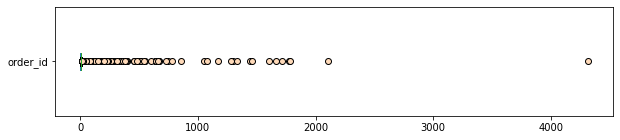

In [77]:
afisha_df_user_device[afisha_df_user_device['device_type_canonical']=='mobile']['order_id'].plot(figsize=(10,2),
                                                                                                 kind='box', 
                                                                                                 vert=False,
                                                                                                 flierprops=dict(markerfacecolor='peachpuff'))
plt.show()

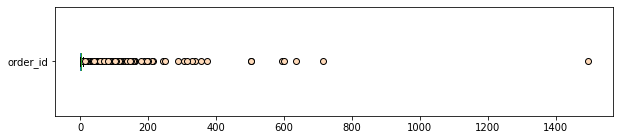

In [78]:
afisha_df_user_device[afisha_df_user_device['device_type_canonical']=='desktop']['order_id'].plot(figsize=(10,2),
                                                                                                 kind='box', 
                                                                                                 vert=False,
                                                                                                 flierprops=dict(markerfacecolor='peachpuff'))
plt.show()

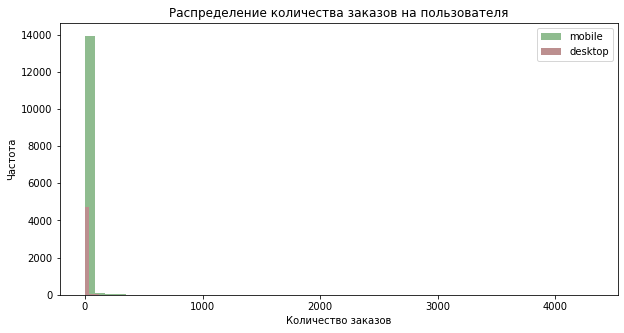

In [79]:
# построение гистограммы распределения кодичества заказов на пользователя для двух устройств
plt.figure(figsize=(10, 5))
           
afisha_df_user_device[afisha_df_user_device['device_type_canonical']=='mobile']['order_id'].plot(kind='hist', 
                                                                                                 bins=50, 
                                                                                                 color='darkseagreen')

afisha_df_user_device[afisha_df_user_device['device_type_canonical']=='desktop']['order_id'].plot(kind='hist', 
                                                                                                 bins=50, 
                                                                                                 color='rosybrown')

plt.title('Распределение количества заказов на пользователя')
plt.xlabel('Количество заказов')
plt.ylabel('Частота')
plt.legend(labels=['mobile','desktop'])

plt.show()

In [80]:
# агрегация значений по типам устройств и расчет целевой метрики
group_device= afisha_df_user_device.groupby('device_type_canonical').agg(user_count=('user_id','count'), order_sum=('order_id','sum'), order_mean=('order_id','mean')).reset_index()
group_device

,device_type_canonical,user_count,order_sum,order_mean
0,desktop,4862,34239,7.042164
1,mobile,14110,133648,9.471864


In [81]:
# т-тест Уэлча

sample_a = afisha_df_user_device[afisha_df_user_device['device_type_canonical']=='mobile']['order_id']
sample_b = afisha_df_user_device[afisha_df_user_device['device_type_canonical']=='desktop']['order_id']

alpha = 0.05

t_test=st.ttest_ind(sample_a, sample_b, equal_var=False, alternative='greater')

if t_test.pvalue>alpha:
    print(f'p_value={t_test.pvalue:.5f} > alpha= {alpha}')
    print(f'Нулевая гипотеза не может быть отвергнута.')
else:
    print(f'p_value={t_test.pvalue:.5f} < alpha={alpha}')
    print('Нулевая гипотеза не находит подтверждение.')

p_value=0.00080 < alpha=0.05
Нулевая гипотеза не находит подтверждение.


Расчетное значение целевой метрики составило 7 и 9.5 для мобильной и станционарной версии соответственно. Получается, что пользователи мобильной версии совершают на 35% больше заказов, чем стационарной. 
Чтобы учесть размер выборок, распределение данных в них и т.д., для подтверждения/опровержения гипотезы использован стат.тест, а именно` t-тест Уэлча`.

Предварительный анализ данных и рассчитанные статистики, показали, что:
- пользователей в каждой из выборок более 4тыс. (в мобильной версии в 3 раза больше, чем в стационарной);
- есть пересечение пользователей между выборками (пользователи из выборки удалены не были, т.к. учитывая специфику бизнеса, один пользователь может одновременно использовать два типа устройств и их наличие не приведет к искажению результатов, проводимого эксперимента);
- значение стандратного отклонения находятся на разном уровне (*std для выборки мобильные устройства = 67.96, std для выборки Стационарные устройства = 35.91*), по процентилям схожесть в распределении;
- выбросы присутствуют в каждой выборке, как результат существенная разница между средним и медианным значением и наличие "хвоста" на гистограммах распределения.
Обнаружено аномальное значение- 4314 на пользователя мобильного приложения. Детальный анализ показал, что этот пользователь совершает заказы с двух устройств (т.к. пользователь попал в обе выборки и для обеих это аномалия-максимум по количеству заказов, принято решение не исключать аномалию). 

Уровень статистической значимости был выбран стандартный- *0.05*.

По результатам теста: *значение p_value меньше уровня статистической значимости*. Это позволяет отвергнуть нулевую гипотезу о том, что среднее количество заказов на пользователя одинаковое для двух типов устройств.

### 4.2 Среднее время между заказами

*Н0: Среднее время между заказами пользователей не различается для мобильного приложения и стационарного устройства.*  

*Н1: Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.*

In [82]:
afisha_df_autumn_loyl=afisha_df[(afisha_df['season']=='Осень')&(afisha_df['days_since_prev']>0)]

In [83]:
afisha_df_autumn_loyl.groupby('device_type_canonical')['days_since_prev'].describe()

,count,mean,std,min,25%,50%,75%,max
device_type_canonical,,,,,,,,
desktop,8290.0,12.013510,21.755567,1.0,1.0,3.0,11.0,146.0
mobile,39245.0,12.171156,21.779203,1.0,1.0,3.0,11.0,148.0


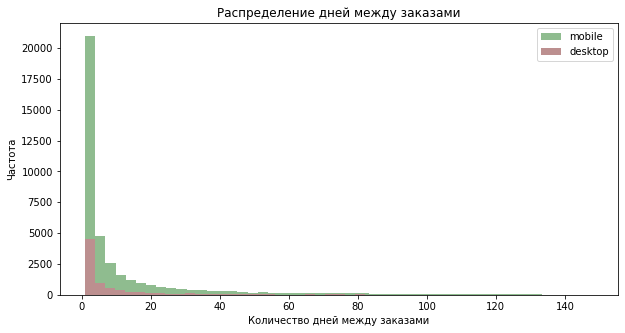

In [84]:
# построение гистограммы распределения дней между заказами для двух устройств
plt.figure(figsize=(10, 5))

afisha_df_autumn_loyl[afisha_df_autumn_loyl['device_type_canonical']=='mobile']['days_since_prev'].plot(kind='hist',
                                                                                                        bins=50,
                                                                                                        color='darkseagreen')

afisha_df_autumn_loyl[afisha_df_autumn_loyl['device_type_canonical']=='desktop']['days_since_prev'].plot(kind='hist',
                                                                                                        bins=50,
                                                                                                        color='rosybrown')

plt.title('Распределение дней между заказами')
plt.xlabel('Количество дней между заказами')
plt.ylabel('Частота')
plt.legend(labels=['mobile','desktop'])

plt.show()

In [85]:
afisha_df_autumn_loyl.groupby('device_type_canonical')['days_since_prev'].mean()

device_type_canonical
desktop    12.013510
mobile     12.171156
Name: days_since_prev, dtype: float64

In [86]:
# т-тест Уэлча

sample_a=afisha_df_autumn_loyl[afisha_df_autumn_loyl['device_type_canonical']=='mobile']['days_since_prev']
sample_b=afisha_df_autumn_loyl[afisha_df_autumn_loyl['device_type_canonical']=='desktop']['days_since_prev']

t_test=st.ttest_ind(sample_a, sample_b, equal_var= False, alternative='greater')

alpha=0.05

if t_test.pvalue>alpha:
    print(f'p_value={t_test.pvalue:.2f} > alpha= {alpha}')
    print(f'Нулевая гипотеза не может быть отвергнута.')
else:
    print(f'p_value={t_test.pvalue:.5f} < alpha={alpha}')
    print('Нулевая гипотеза не находит подтверждение.')


p_value=0.27 > alpha= 0.05
Нулевая гипотеза не может быть отвергнута.


Расчетное значение целевой метрики составило 12.1 и 12 для мобильной и станционарной версии соответственно. Получается, что тип устройства не влияет на среднее время между заказами.
Чтобы учесть размер выборок, распределение данных в них и т.д., для подтверждения/опровержения гипотезы использован стат.тест, а именно ` t-тест Уэлча`.

Предварительный анализ данных и рассчитанные статистики, показали, что:
- количество повторных заказов в каждой из выборок более 8тыс. (в мобильной версии почти в 5 раз больше, чем в стационарной);
- значение стандратного отклонения находятся на одном уровне (*std для выборки мобильные устройства = 21.78, std для выборки Стационарные устройства = 21.76*), по процентилям идентичность в распределении;
- выбросы присутствуют в каждой выборке, как результат существенная разница между средним и медианным значением и наличие "хвоста" на гистограммах распределения.

Уровень статистической значимости был выбран стандартный- *0.05*.

По результатам теста: *значение p_value больше уровня статистической значимости*. Это не позволяет отвергнуть нулевую гипотезу о том, что среднее время между заказами одинаковое для двух типов устройств. Это значит, что пользователи возвращаются в обе версии с одинаковым интервалом.

## Общий вывод и рекомендации

В рамках данного проекта проведен анализ данных Яндекс Афиша о заказах, совершаемых пользователями, с детализацией до мероприятия, на которое приобретен билет, городе, регионе, площадки его проведения.  
Период анализа июнь- октябрь 24г.  
После этапа предобработки общий объем данных, использованный на начальном этапе исследовательского анализа, включал 281 863 заказа.  

На этапе исследовательского анализа данных выявлено:  
- неравномерное распределение по типам мероприятия (явные лидеры *Концерты, театр, другое*);
- существенный рост пользовательской активности в осенние месяцы;
- снижение выручки с билета в осенние месяцы по популярным категориям.  

Далее был проведен более детальный анализ осеннего периода. Он указал на:
- резкий скачок спроса в первые числа месяца;
- резкое снижение стоимости одного билета в первые числа месяца;   
- большую активность пользователей в будни в сравнении с выходными.  

В разрезе регионов выявлена неравномерность в распределении: 40% от всех мероприятий и заказов приходится на два региона.
В разрезе партнеров ситуация более стабильная, но тем не менее можно выделить 5ку явных лидеров. При этом стоит отметить, что позиция партнера в числе заказов не всегда совпадает с позицией партнера в объеме выручке.   

На этапе статистического анализа было проверено две гипотезы. По результатам выяснено, что:  
- больший объем выручки генерируется, благодаря мобильной версии приложения (что в целом соответствует общему тренду на рынке); 
- временной интервал, через который пользователей оформляет повторный заказ не зависит от типа устройства.

Основываясь на этих результатах, можно сделать вывод, что в первую очередь необходимо поддерживать эффективность/апгредить мобильную версию приложения; для повышения выходного спроса до уровня будней попробовать внедрить акцию выходного дня, возможно в связке с ключевыми партнерами (предварительно соотнеся объем потерь в выручке с объемом прироста заказов от мероприятия); дополнительно провести анализ стоимости билетов (не только доходов от их продажи), для того чтобы подтвердить/опровергнуть гипотезу о том, что партнеры-лидеры по продажам продают билеты по более низким ценам и из-за этого комиссионных доход от их продаж генерируется меньше.